In [1]:
import tensorflow as tf
from tensorflow.python.keras import models
from matplotlib import pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 40

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('Dataset', shuffle=True,
                                                              image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size=BATCH_SIZE)

Found 26403 files belonging to 22 classes.


In [4]:
class_names = dataset.class_names

In [5]:
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [6]:
def train_test_validation_split(ds, train_split=0.9, validation_split=0.1, shuffle=False, shuffle_size=1000):
    dataset_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=15)

    train_size = int(train_split * dataset_size)
    validation_size = int(validation_split * dataset_size)

    train_dataset = ds.take(train_size)
    validation_dataset = ds.skip(train_size).take(validation_size)
    test_dataset = ds.skip(train_size).skip(validation_size)
    return train_dataset, validation_dataset, test_dataset

In [7]:
train_dataset, validation_dataset, test_dataset = train_test_validation_split(dataset)

In [8]:
# Improves the performance of the Dataset
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [9]:
# Scaling of The Dataset
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [10]:
# Rotates the Image if Horizontal takes place
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

In [11]:
# Convolutional Neural Network
# Model Architecture
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 22
model = models.Sequential([
    resize_and_rescale,
    tf.keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, kernel_size=(2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.build(input_shape=input_shape)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (32, 256, 256, 3)         0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (32, 255, 255, 32)        416       
_________________________________________________________________
module_wrapper_2 (ModuleWrap (32, 127, 127, 32)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (32, 126, 126, 64)        8256      
_________________________________________________________________
module_wrapper_4 (ModuleWrap (32, 63, 63, 64)          0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (32, 62, 62, 128)         32896     
_________________________________________________________________
module_wrapper_6 (ModuleWrap (32, 31, 31, 128)         0

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=validation_dataset,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/40
743/743 [==============================] - 344s 448ms/step - loss: 1.6720 - accuracy: 0.4716 - val_loss: 0.9131 - val_accuracy: 0.6944
Epoch 2/40
743/743 [==============================] - 218s 293ms/step - loss: 0.5811 - accuracy: 0.8074 - val_loss: 0.4174 - val_accuracy: 0.8655
Epoch 3/40
743/743 [==============================] - 261s 351ms/step - loss: 0.3442 - accuracy: 0.8854 - val_loss: 0.2936 - val_accuracy: 0.9055
Epoch 4/40
743/743 [==============================] - 238s 320ms/step - loss: 0.2375 - accuracy: 0.9183 - val_loss: 0.2201 - val_accuracy: 0.9287
Epoch 5/40
743/743 [==============================] - 234s 315ms/step - loss: 0.1966 - accuracy: 0.9321 - val_loss: 0.2781 - val_accuracy: 0.9055
Epoch 6/40
743/743 [==============================] - 235s 316ms/step - loss: 0.1616 - accuracy: 0.9449 - val_loss: 0.2594 - val_accuracy: 0.9150
Epoch 7/40
743/743 [==============================] - 233s 313ms/step - loss: 0.1246 - accuracy: 0.9575 - val_loss: 0.2769 -

In [15]:
score = model.evaluate(test_dataset)

1/1 [==============================] - 20s 20s/step - loss: 9.9341e-07 - accuracy: 1.0000


In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

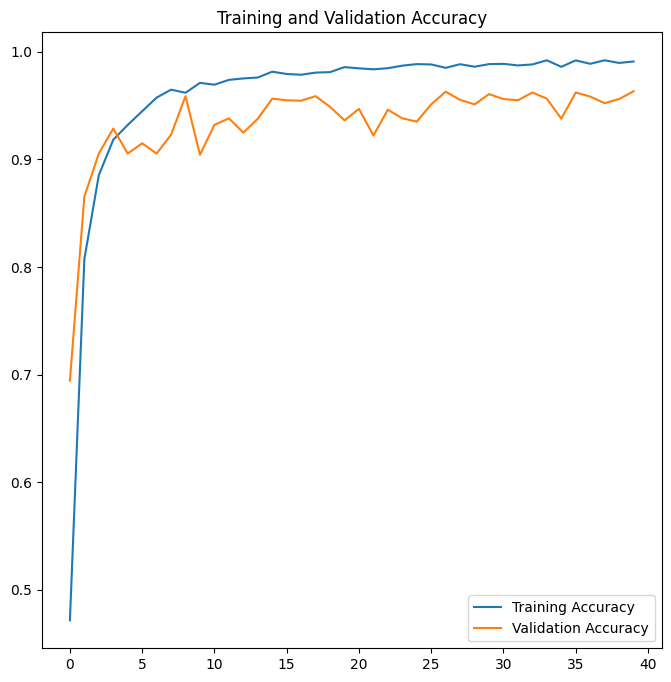

In [17]:
plt.figure(figsize=(8, 8))
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

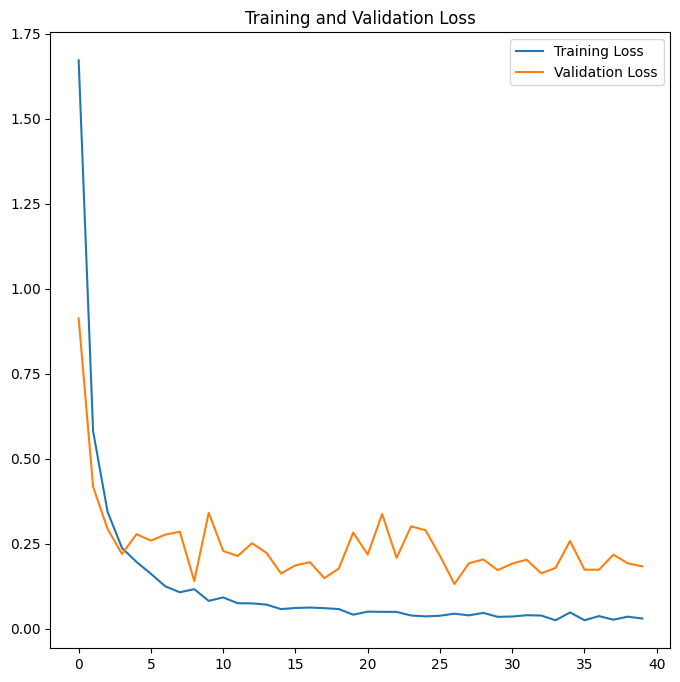

In [18]:
plt.figure(figsize=(8, 8))
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()